In [1]:
import numpy
X1=numpy.ones(15)
X1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [4]:

XX=numpy.array([i+1 for i in range(len(X1))])
print(XX)



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [5]:
MM=numpy.vstack((X1,XX)).T
print(MM)

[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]
 [ 1. 14.]
 [ 1. 15.]]


In [6]:
g=lambda x : 2+3*x

In [7]:


Y=numpy.array([g(x)+numpy.random.normal(0,1.5) for x in XX])

print(Y)
print("----"*20)



[ 5.0937311   9.05515406 11.82658398 13.44916561 15.92029848 20.3446837
 19.64809822 27.04165487 29.87857335 32.72512096 32.35297766 36.70901246
 39.4340006  43.74384443 48.61773206]
--------------------------------------------------------------------------------


In [8]:
S1=numpy.matmul(MM.T, MM)#矩阵的积
print(S1)

[[  15.  120.]
 [ 120. 1240.]]


In [9]:
S2=numpy.linalg.inv(S1)
S3=numpy.matmul(Y.T, MM)
S=numpy.matmul(S2, S3)
print("Estimateurs=",S)

Estimateurs= [2.06082287 2.95773574]


In [17]:


E=Y-numpy.dot(MM , S)#矩阵积
## variance d'erreurs
numpy.dot(E,E)/(1.0*len(X1))

S[0]




2.0608228677711224

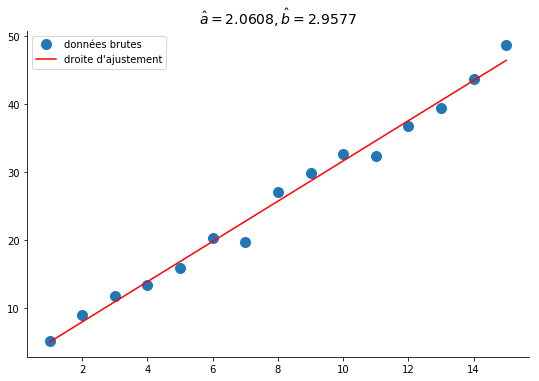

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 6))

ax.spines['top'].set_visible(False)  # cacher le cadre du haut
ax.spines['right'].set_visible(False)  # cacher le cadre de droit
     
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


plt.plot(XX, Y,'o', label='données brutes', markersize=10)
plt.plot(XX,S[1]*XX + S[0], 'r', label="droite d'ajustement")

plt.title("$\\hat{a}=%.4f , \\hat{b}=%.4f $"%(S[0],S[1]) , fontsize=14)
plt.legend()
plt.show()


In [84]:


def ML_linear_regression(X,Y):
    import numpy
    import matplotlib.pyplot as plt
    X1=numpy.ones(len(X))
    Input=numpy.vstack((X1,X)).T
    S1=numpy.matmul(Input.T,Input)
    S2=numpy.linalg.inv(S1)
    S3=numpy.matmul(Y,Input)
    esti=numpy.matmul(S2, S3)
    E=Y-numpy.matmul(Input, esti)
    error=numpy.dot(E,E)/(1.0*len(X1))
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.spines['top'].set_visible(False)  # cacher le cadre du haut
    ax.spines['right'].set_visible(False)  # cacher le cadre de droit   
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.plot(X, Y,'o', label='données brutes', markersize=10)
    plt.plot(X,numpy.matmul(Input, esti), 'r', label="droite d'ajustement")
    plt.title("$\\hat{a}=%.4f , \\hat{b}=%.4f $"%(esti[0],esti[1]) , fontsize=14)
    plt.legend()
    plt.show()
    return esti,numpy.matmul(Input, esti),error




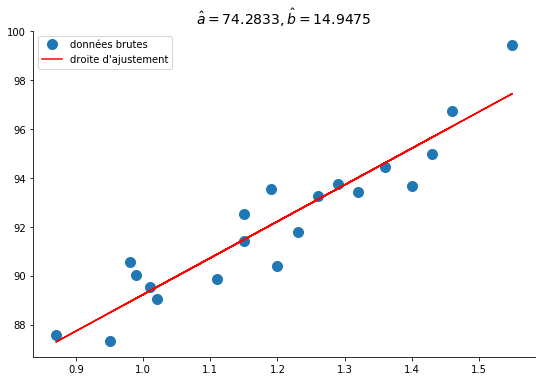

(array([74.28331424, 14.94747973]),
 array([89.08131918, 89.52974357, 91.47291593, 93.56556309, 96.10663465,
        94.61188668, 87.28762161, 92.66871431, 97.45190783, 95.20978587,
        92.07081512, 91.47291593, 88.93184438, 89.38026877, 90.87501674,
        92.22028992, 93.1171387 , 94.01398749, 95.65821026, 88.48341999]),
 1.0624908437610185)

In [85]:
X=[0.99,1.02,1.15,1.29,1.46,1.36,0.87,1.23,1.55,1.40,1.19,
   1.15,0.98,1.01,1.11,1.20,1.26,1.32,1.43,0.95]

Y=[90.01,89.05,91.43,93.74,96.73,94.45,87.59,91.77,99.42,93.65,
   93.54,92.52,90.56,89.54,89.85,90.39,93.25,93.41,94.98,87.33]


ML_linear_regression(X,Y)

In [106]:

def ML_linear_regression_2(X,Y):
    import numpy
    import matplotlib.pyplot as plt
    X1=numpy.ones(len(X))
    g=lambda x : x*x
    X3=numpy.array([g(x) for x in X])
    Input=numpy.vstack((X1,X,X3)).T
    S1=numpy.matmul(Input.T,Input)
    S2=numpy.linalg.inv(S1)
    S3=numpy.matmul(Y,Input)
    esti=numpy.matmul(S2, S3)
    E=Y-numpy.matmul(Input, esti)
    error=numpy.dot(E,E)/(1.0*len(X1))
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.spines['top'].set_visible(False)  # cacher le cadre du haut
    ax.spines['right'].set_visible(False)  # cacher le cadre de droit   
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.plot(X, Y,'o', label='données brutes', markersize=10)
    plt.plot(X,numpy.matmul(Input, esti), 'r', label="droite d'ajustement")
    plt.title("$\\hat{a}=%.4f , \\hat{b}=%.4f ,\\hat{c}=%.4f $ $"%(esti[0],esti[1],esti[2]) , fontsize=14)
    plt.legend()
    plt.show()
    return esti,numpy.matmul(Input, esti),error




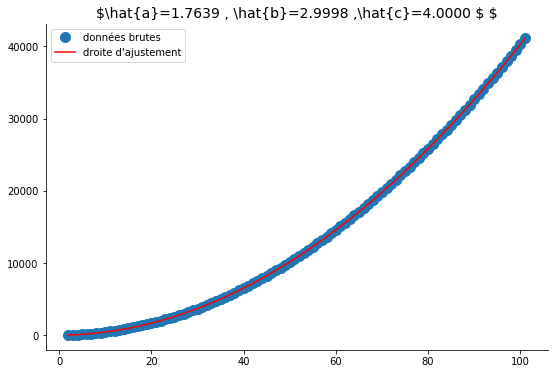

(array([1.76390768, 2.99977683, 4.00003804]),
 array([2.37636135e+01, 4.67635806e+01, 7.77636237e+01, 1.16763743e+02,
        1.63763938e+02, 2.18764210e+02, 2.81764557e+02, 3.52764981e+02,
        4.31765480e+02, 5.18766056e+02, 6.13766708e+02, 7.16767436e+02,
        8.27768240e+02, 9.46769120e+02, 1.07377008e+03, 1.20877111e+03,
        1.35177222e+03, 1.50277340e+03, 1.66177466e+03, 1.82877600e+03,
        2.00377741e+03, 2.18677890e+03, 2.37778046e+03, 2.57678211e+03,
        2.78378382e+03, 2.99878562e+03, 3.22178749e+03, 3.45278943e+03,
        3.69179145e+03, 3.93879355e+03, 4.19379572e+03, 4.45679797e+03,
        4.72780030e+03, 5.00680270e+03, 5.29380518e+03, 5.58880773e+03,
        5.89181036e+03, 6.20281307e+03, 6.52181585e+03, 6.84881871e+03,
        7.18382164e+03, 7.52682465e+03, 7.87782774e+03, 8.23683090e+03,
        8.60383414e+03, 8.97883746e+03, 9.36184085e+03, 9.75284432e+03,
        1.01518479e+04, 1.05588515e+04, 1.09738552e+04, 1.13968589e+04,
        1.18278628

In [114]:
XX=numpy.array([i+1 for i in range(1,101)])
g=lambda x : 2+3*x+4*x*x
Y=numpy.array([g(x)+numpy.random.normal(0,1.5) for x in XX])
ML_linear_regression_2(XX,Y)